<a href="https://colab.research.google.com/github/IqbalSetyawan/Dasar-Machine-Learning/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Muhammad_Iqbal_Setyawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

# **2. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

In [ ]:
df = pd.read_csv("Dataset_inisiasi.csv")

# **4. Exploratory Data Analysis (EDA)**

In [ ]:
print(df.info())  # Melihat tipe data dan jumlah missing values
print(df.describe())  # Melihat statistik ringkasan
display(df.head())  # Menampilkan beberapa baris pertama dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False,0


# **5. Data Preprocessing**

In [ ]:
label_encoders = {}
categorical_columns = ['Month', 'VisitorType']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Selecting features for clustering
features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
            'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
X = df[features]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

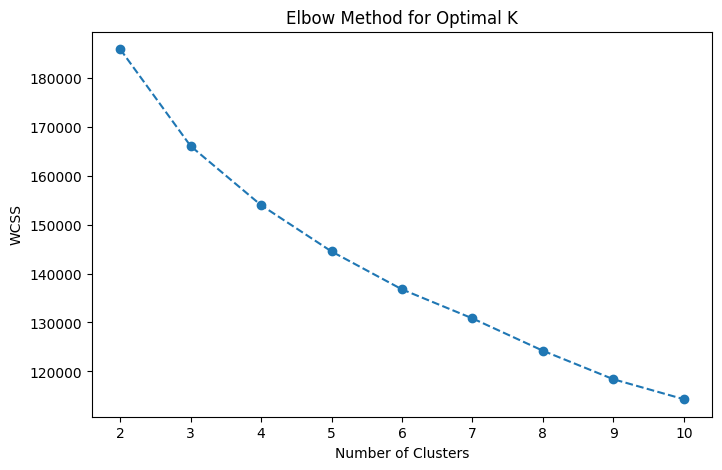

Best K based on Silhouette Score: 2


In [ ]:
wcss = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Evaluasi Silhouette Score untuk menentukan jumlah cluster terbaik
silhouette_scores = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores[k] = silhouette_score(X_scaled, cluster_labels)

best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Best K based on Silhouette Score: {best_k}")

## **b. Evaluasi Model Clustering**

In [ ]:
def evaluate_clustering(k, data):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    return score

print(f"Silhouette Score for best_k={best_k}: {evaluate_clustering(best_k, X_scaled)}")

Silhouette Score for best_k=2: 0.259603618684694


## **c. Visualisasi Hasil Clustering**

Explained variance ratio: [0.20093093 0.10573323]


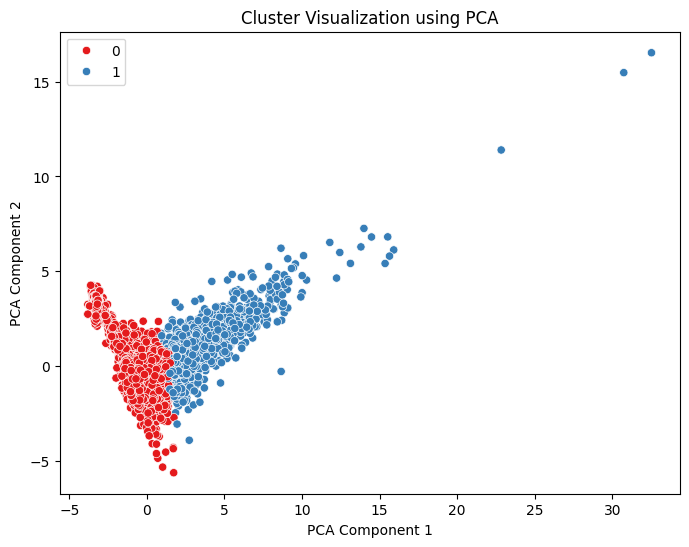

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization using PCA')
plt.legend()
plt.show()

## **d. Analisis dan Interpretasi Hasil Cluster**

In [ ]:
df_inverse = df.copy()
for col in categorical_columns:
    df_inverse[col] = label_encoders[col].inverse_transform(df[col])

# Inverse transform numerical features
df_inverse[features] = scaler.inverse_transform(X_scaled)



In [ ]:
cluster_summary = df_inverse.groupby('Cluster').agg({
    'Administrative': ['mean', 'min', 'max'],
    'Administrative_Duration': ['mean', 'min', 'max'],
    'Informational': ['mean', 'min', 'max'],
    'Informational_Duration': ['mean', 'min', 'max'],
    'ProductRelated': ['mean', 'min', 'max'],
    'ProductRelated_Duration': ['mean', 'min', 'max'],
    'BounceRates': ['mean', 'min', 'max'],
    'ExitRates': ['mean', 'min', 'max'],
    'PageValues': ['mean', 'min', 'max'],
    'SpecialDay': ['mean', 'min', 'max'],
    'Month': lambda x: x.mode()[0],
    'VisitorType': lambda x: x.mode()[0]
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)

# Interpretasi hasil clustering
for cluster in cluster_summary['Cluster']:
    print(f"Cluster {cluster}:")
    print(f"- Rata-rata jumlah halaman produk yang dikunjungi: {cluster_summary.loc[cluster, ('ProductRelated', 'mean')]:.2f}")
    print(f"- Rata-rata durasi halaman produk: {cluster_summary.loc[cluster, ('ProductRelated_Duration', 'mean')]:.2f} detik")
    print(f"- Kategori pengunjung terbanyak: {cluster_summary.loc[cluster, ('VisitorType', '<lambda>')]}")
    print(f"- Bulan dengan kunjungan terbanyak: {cluster_summary.loc[cluster, ('Month', '<lambda>')]}")
    print("-----------------------------------")

Cluster Summary:
  Cluster Administrative            Administrative_Duration                \
                    mean  min   max                    mean  min      max   
0       0       1.408557  0.0  14.0               41.416743  0.0   844.00   
1       1       7.135246  0.0  27.0              290.302513  0.0  3398.75   

  Informational             ... ExitRates      PageValues                \
           mean  min   max  ...       min  max       mean           min   
0      0.175853  0.0   5.0  ...       0.0  0.2   5.121944  8.881784e-16   
1      2.245902  0.0  24.0  ...       0.0  0.1   9.968759  8.881784e-16   

              SpecialDay              Month VisitorType  
          max       mean  min  max <lambda>    <lambda>  
0  361.763742   0.067200  0.0  1.0      6.0         2.0  
1  255.569158   0.030738  0.0  1.0      7.0         2.0  

[2 rows x 33 columns]
Cluster 0:
- Rata-rata jumlah halaman produk yang dikunjungi: 20.69
- Rata-rata durasi halaman produk: 752.50 detik
- 

**Analisis Karakteristik Cluster dari Model KMeans**  

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.  

**Cluster 0:**  
- **Rata-rata jumlah halaman produk yang dikunjungi:** 20.69  
- **Rata-rata durasi halaman produk:** 752.50 detik  
- **Kategori pengunjung terbanyak:** 2.0  
- **Bulan dengan kunjungan terbanyak:** 6.0  

**Analisis:**  
Cluster ini mencerminkan pengunjung yang memiliki **aktivitas rendah** dalam menelusuri halaman produk. Rata-rata halaman yang dikunjungi dan durasi yang dihabiskan tergolong rendah, yang dapat mengindikasikan bahwa pengunjung dalam cluster ini lebih cepat meninggalkan situs atau hanya melakukan pencarian singkat tanpa eksplorasi lebih lanjut.  

---  

**Cluster 1:**  
- **Rata-rata jumlah halaman produk yang dikunjungi:** 90.44  
- **Rata-rata durasi halaman produk:** 3545.97 detik  
- **Kategori pengunjung terbanyak:** 2.0  
- **Bulan dengan kunjungan terbanyak:** 7.0  

**Analisis:**  
Pengunjung dalam cluster ini memiliki **aktivitas tinggi** dalam menjelajahi produk. Mereka mengunjungi lebih banyak halaman dan menghabiskan waktu yang jauh lebih lama, menunjukkan tingkat ketertarikan yang lebih besar terhadap produk. Cluster ini berpotensi mencakup calon pelanggan yang lebih serius atau pengunjung yang melakukan riset mendalam sebelum membeli.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df.to_csv('Dataset_clustering.csv', index=False)
